In [1]:
# lib
import sys

sys.path.append("..")

# set cwd one up
import os

os.chdir("..")
path = "data/hes/Hes1_example.csv"


In [2]:
# Standard Library Imports
from typing import Sequence

# Third-Party Library Imports
import numpy as np
import tensorflow as tf
import gpflow
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

# Direct Namespace Imports
from gpflow.kernels import Cosine, Matern12
from gpflow.models import GPR
from gpflow.optimizers import Scipy
from tensorflow import Tensor

# Internal Project Imports
from gpcell.utils import load_data, detrend, background_noise
from gpcell.backend import GPRConstructor, GPPrior, Numeric


# TFP shortcuts
tfd = tfp.distributions
tfb = tfp.bijectors
f64 = gpflow.utilities.to_default_float

In [3]:
# -------------------------------------------------#
# --- Load data, preprocess, and define priors --- #
# -------------------------------------------------#

# load data
X_data_list, Y_data_list = load_data(path, "Time (h)", "Cell")
X_background_list, Y_background_list = load_data(path, "Time (h)", "Background")
num_cells = len(Y_data_list)
print(f"Loaded {num_cells} cells for analysis.")

# preprocess
mean_noise, _ = background_noise(
    X_background_list, Y_background_list, 7.0, verbose=True
)
noise_list = [mean_noise / np.std(y) for y in Y_data_list]

Y_detrended_list, _ = detrend(X_data_list, Y_data_list, 7.0, verbose=True)


# define priors
def generate_ou_priors(noise: Numeric) -> GPPrior:
    return {
        "kernel.lengthscales": tfd.Uniform(low=f64(0.1), high=f64(2.0)),
        "kernel.variance": tfd.Uniform(low=f64(0.1), high=f64(2.0)),
        "likelihood.variance": noise**2,
    }


def generate_ouosc_priors(noise: Numeric) -> GPPrior:
    return {
        "kernel.kernels[0].lengthscales.prior": tfd.Uniform(
            low=f64(0.1), high=f64(2.0)
        ),
        "kernel.kernels[0].variance.prior": tfd.Uniform(low=f64(0.1), high=f64(2.0)),
        "kernel.kernels[1].lengthscales.prior": tfd.Uniform(
            low=f64(0.1), high=f64(4.0)
        ),
        "likelihood.variance": noise**2,
    }


# define trainables
ou_trainables = {"likelihood.variance": False}
ouosc_trainables = {
    "likelihood.variance": False,
    (1, "variance"): False,
}

Loaded 12 cells for analysis.

Background noise results:
Standard deviation: 7.302221575486058



Processing cell 1/12 with 93 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.93869
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.2722221500175108
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.023293062757986666
GPMC.V,Parameter,Identity,Normal,True,"(93, 1)",float64,[[3.65786163e-01...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.1421450856770823
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.31009
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,4.0889
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.023293062757986666
GPMC.V,Parameter,Identity,Normal,True,"(93, 1)",float64,[[0.59824294...



Processing cell 2/12 with 57 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.9283
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.2859802302256559
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0052714860163474
GPMC.V,Parameter,Identity,Normal,True,"(57, 1)",float64,[[0.45480665...


2025-03-11 11:32:48.519442: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:32:48.545106: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:32:49.201223: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:32:49.406551: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:32:49.924686: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular out

name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.017565875524472203
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.8305491705063277
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,14.26328
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0052714860163474
GPMC.V,Parameter,Identity,Normal,True,"(57, 1)",float64,[[1.71597...



Processing cell 3/12 with 53 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.88588
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.28907775696033106
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.03278511768746204
GPMC.V,Parameter,Identity,Normal,True,"(53, 1)",float64,[[0.29673153...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.24809493680941752
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.96905
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,3.77217
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.03278511768746204
GPMC.V,Parameter,Identity,Normal,True,"(53, 1)",float64,[[1.0921...



Processing cell 4/12 with 81 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.9089
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.28326865359943565
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.013327560407064986
GPMC.V,Parameter,Identity,Normal,True,"(81, 1)",float64,[[0.10788464...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.16714461221034893
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.10001003221198394
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.48679
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.013327560407064986
GPMC.V,Parameter,Identity,Normal,True,"(81, 1)",float64,[[0.2569876...



Processing cell 5/12 with 76 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.24793
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.8096336933541299
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.9999999999999999
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.020721004535560715
GPMC.V,Parameter,Identity,Normal,True,"(76, 1)",float64,[[0.41830894...


2025-03-11 11:33:09.056168: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:09.390613: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:09.644029: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:09.812689: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:09.889185: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular out

name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.33188454342557316
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.9197650565908181
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.45806801103301836
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.020721004535560715
GPMC.V,Parameter,Identity,Normal,True,"(76, 1)",float64,[[0.33260889...



Processing cell 6/12 with 55 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.25333
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.7955799746571175
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0077451438000972995
GPMC.V,Parameter,Identity,Normal,True,"(55, 1)",float64,[[1.35307...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.39159128352003303
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.71066
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,3.91068
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0077451438000972995
GPMC.V,Parameter,Identity,Normal,True,"(55, 1)",float64,[[2.0664...



Processing cell 7/12 with 75 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.27393
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.8232874405279023
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.023833995263232266
GPMC.V,Parameter,Identity,Normal,True,"(75, 1)",float64,[[-0.98138491...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.42833518244130064
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.54364
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,3.70389
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.023833995263232266
GPMC.V,Parameter,Identity,Normal,True,"(75, 1)",float64,[[-0.96057689...



Processing cell 8/12 with 64 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.2555
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.8039243540268611
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.9999999999999999
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.02428492790434483
GPMC.V,Parameter,Identity,Normal,True,"(64, 1)",float64,[[-1.03988504e-01...


2025-03-11 11:33:29.795110: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:29.952041: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:29.983137: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:30.425632: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:30.615089: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular out

name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.08194748595564266
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.05936
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,6.12824
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.02428492790434483
GPMC.V,Parameter,Identity,Normal,True,"(64, 1)",float64,[[-0.49886391...



Processing cell 9/12 with 78 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.80661
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.26420212809099103
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.027573813251316432
GPMC.V,Parameter,Identity,Normal,True,"(78, 1)",float64,[[-0.55483325...


2025-03-11 11:33:36.995065: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:37.468577: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:37.508108: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:37.545691: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.
2025-03-11 11:33:37.615645: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular out

name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.07581903553314333
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.5658404403167527
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,3.91098
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.027573813251316432
GPMC.V,Parameter,Identity,Normal,True,"(78, 1)",float64,[[-0.8907527...



Processing cell 10/12 with 78 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.33737
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.7829738858253777
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.06541814713914296
GPMC.V,Parameter,Identity,Normal,True,"(78, 1)",float64,[[-0.7622569...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.360589917185417
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.7188185776544777
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.42297047482859945
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.06541814713914296
GPMC.V,Parameter,Identity,Normal,True,"(78, 1)",float64,[[-0.82553349...



Processing cell 11/12 with 74 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.82605
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.30004770295856714
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.9999999999999933
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.005294209234076662
GPMC.V,Parameter,Identity,Normal,True,"(74, 1)",float64,[[-0.70619751...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.16334177791934562
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.45915
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,3.6405
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.005294209234076662
GPMC.V,Parameter,Identity,Normal,True,"(74, 1)",float64,[[-2.589...



Processing cell 12/12 with 50 data points...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,1.95983
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,0.3992601893944529
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.0
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0054732184721151805
GPMC.V,Parameter,Identity,Normal,True,"(50, 1)",float64,[[-0.20630232...


name,class,transform,prior,trainable,shape,dtype,value
GPMC.kernel.kernels[0].variance,Parameter,Softplus,Uniform,True,(),float64,0.07770763939239796
GPMC.kernel.kernels[0].lengthscales,Parameter,Softplus,Uniform,True,(),float64,1.59793
GPMC.kernel.kernels[1].variance,Parameter,Softplus,,False,(),float64,1.0
GPMC.kernel.kernels[1].lengthscales,Parameter,Softplus,Uniform,True,(),float64,2.59537
GPMC.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0054732184721151805
GPMC.V,Parameter,Identity,Normal,True,"(50, 1)",float64,[[-1.34528...


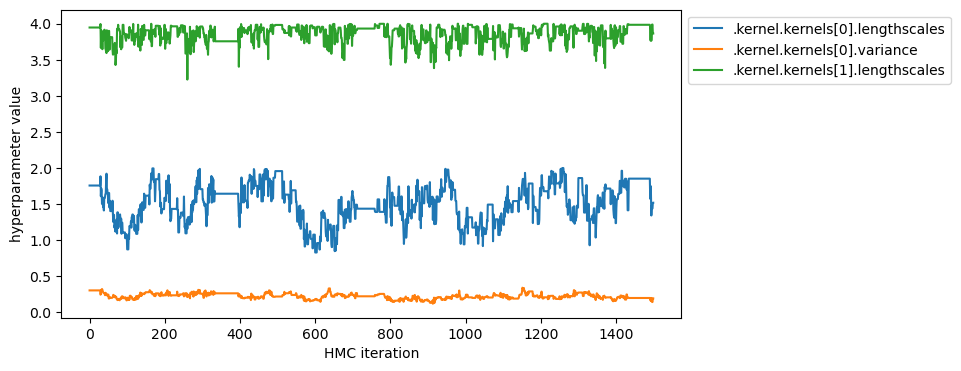

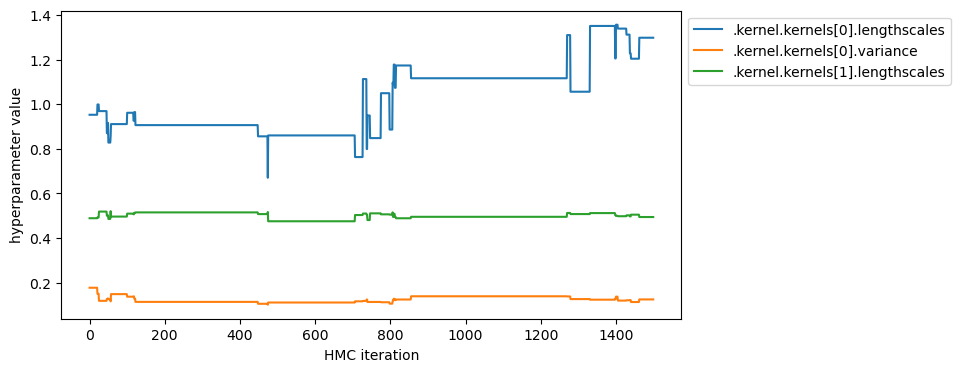

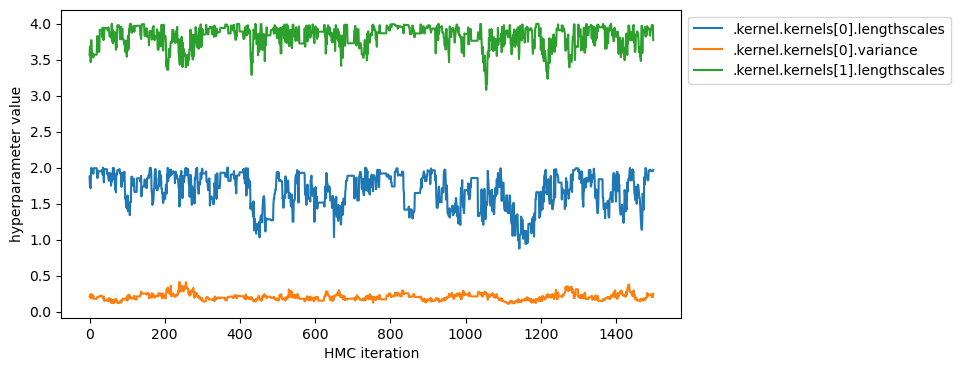

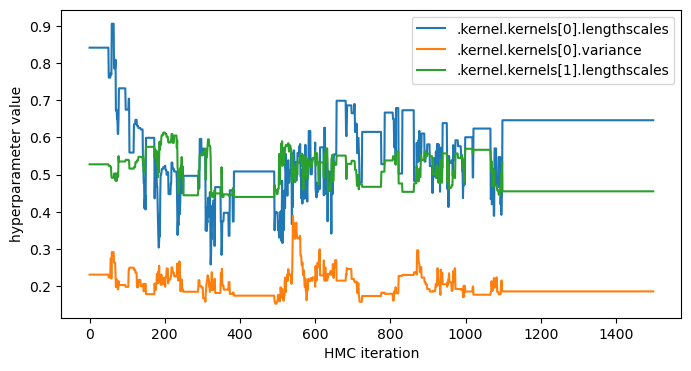

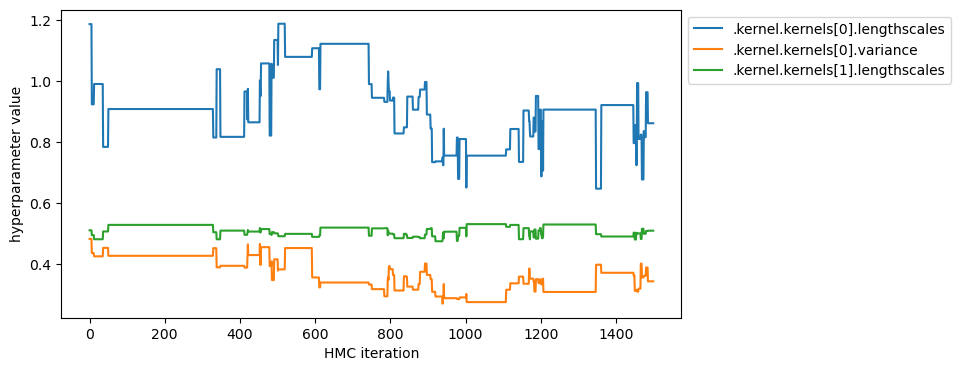

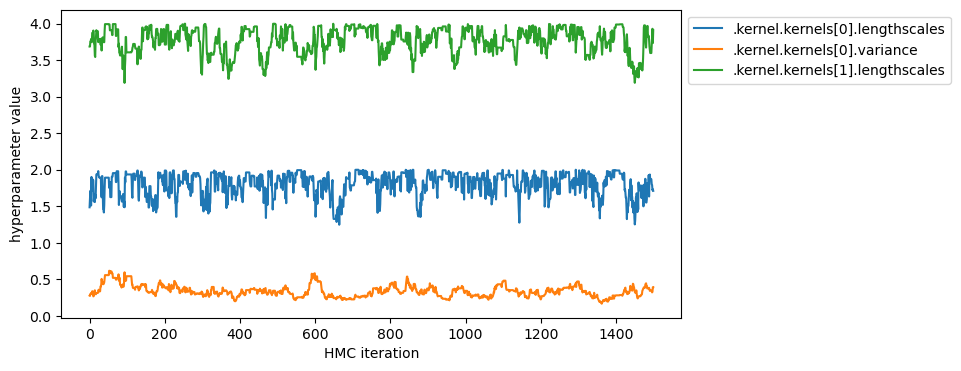

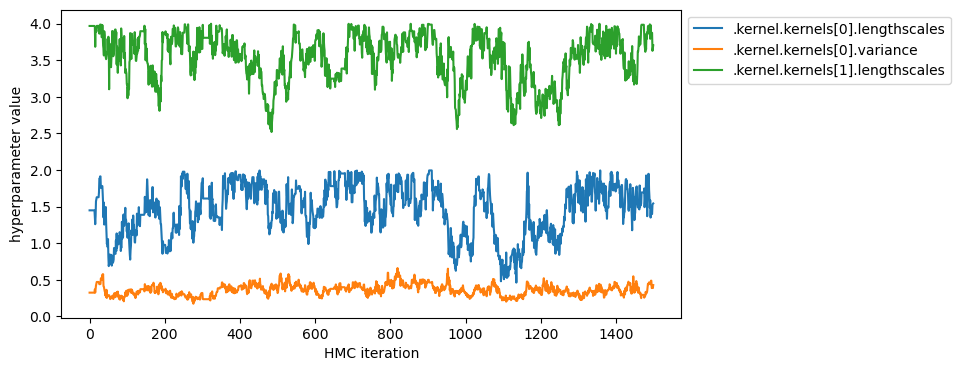

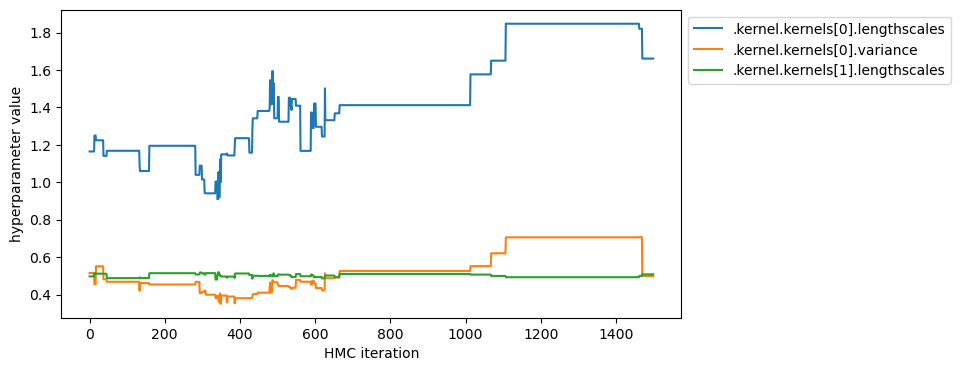

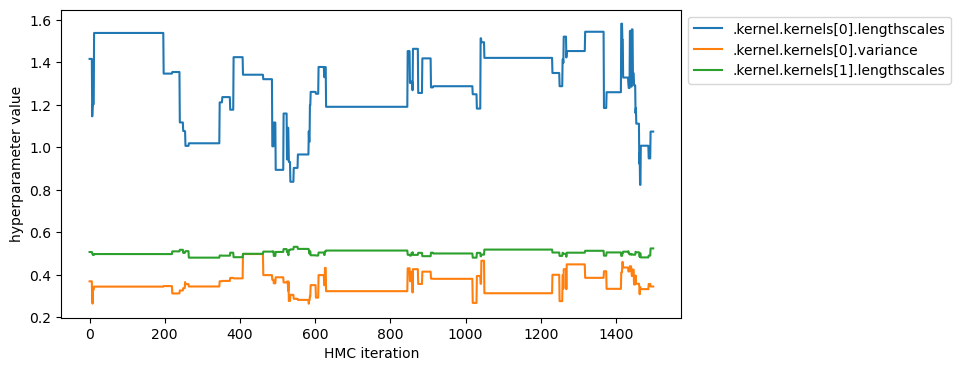

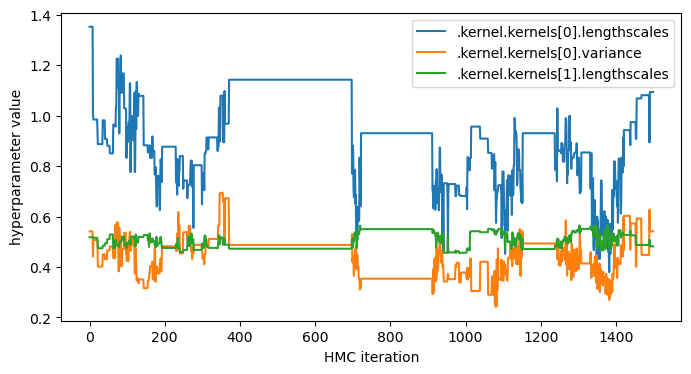

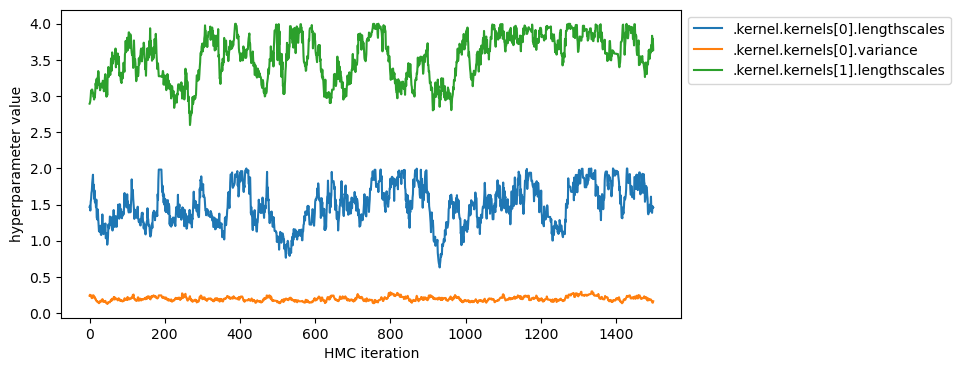

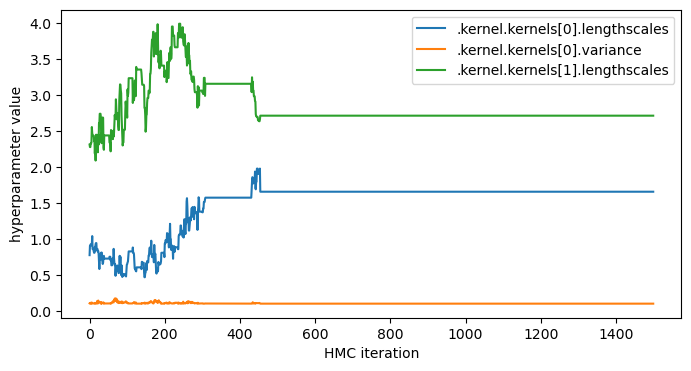

In [4]:
# --- MCMC Sampling Function ---
def run_mcmc(model: GPR, num_samples: int = 1000, num_burnin_steps: int = 500):
    # Note that here we need model.trainable_parameters, not trainable_variables - only parameters can have priors!
    hmc_helper = gpflow.optimizers.SamplingHelper(
        model.log_posterior_density, model.trainable_parameters
    )

    # define model
    hmc = tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=hmc_helper.target_log_prob_fn,
        num_leapfrog_steps=10,
        step_size=0.01,
    )
    adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
        hmc,
        num_adaptation_steps=10,
        target_accept_prob=f64(0.75),
        adaptation_rate=0.1,
    )

    @tf.function(reduce_retracing=True)
    def run_chain_fn():
        return tfp.mcmc.sample_chain(
            num_results=num_samples,
            num_burnin_steps=num_burnin_steps,
            current_state=hmc_helper.current_state,
            kernel=adaptive_hmc,
            trace_fn=lambda _, pkr: pkr.inner_results.is_accepted,
        )

    # run chain and extract samples
    samples, _ = run_chain_fn()
    parameter_samples = hmc_helper.convert_to_constrained_values(samples)

    # map parameter names to indices
    param_to_name = {
        param: name for name, param in gpflow.utilities.parameter_dict(model).items()
    }
    name_to_index = {
        param_to_name[param]: i for i, param in enumerate(model.trainable_parameters)
    }

    return samples, parameter_samples, param_to_name, name_to_index


def plot_samples(
    samples: Sequence[Tensor], parameters, y_axis_label: str, param_to_name: dict
):
    plt.figure(figsize=(8, 4))
    for val, param in zip(samples, parameters):
        plt.plot(tf.squeeze(val), label=param_to_name[param])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlabel("HMC iteration")
    plt.ylabel(y_axis_label)


hyperparameters = [
    ".kernel.kernels[0].lengthscales",
    ".kernel.kernels[0].variance",
    ".kernel.kernels[1].lengthscales",
]

for idx, (X, Y_det) in enumerate(zip(X_data_list, Y_detrended_list)):
    print(f"\nProcessing cell {idx + 1}/{num_cells} with {X.shape[0]} data points...")
    noise = noise_list[idx]

    # Build the GP model on the detrended data
    ouosc_priors = generate_ouosc_priors(noise)
    model_constructor = GPRConstructor(
        [Matern12, Cosine],
        lambda noise=noise: generate_ouosc_priors(noise),
        ouosc_trainables,
        mcmc=True,
    )
    model = model_constructor(X, Y_det)

    optimizer = Scipy()
    optimizer.minimize(
        model.training_loss,
        model.trainable_variables,  # type: ignore
        options=dict(maxiter=100),
    )
    gpflow.utilities.print_summary(model, fmt="notebook")

    # Run MCMC sampling
    samples, parameter_samples, param_to_name, name_to_index = run_mcmc(
        model, num_samples=1500, num_burnin_steps=500
    )

    # plot samples
    plt.figure(figsize=(8, 4))
    for param_name in hyperparameters:
        plt.plot(parameter_samples[name_to_index[param_name]], label=param_name)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlabel("HMC iteration")
    plt.ylabel("hyperparameter value")

    gpflow.utilities.print_summary(model, fmt="notebook")


In [2]:
from gpcell import OscillatorDetector
from gpcell.backend.priors import mcmc_ou_priors, mcmc_ouosc_priors

params = {
    "plots": ["MCMC"],
    "verbose": True,
    "joblib": True,
    "ou_prior_gen": mcmc_ou_priors,
    "ouosc_prior_gen": mcmc_ouosc_priors,
}
od = OscillatorDetector.from_file(path, "Time (h)", "Cell", "Background")
od.fit(methods="MCMC")

Fitting background noise...
